<a href="https://colab.research.google.com/github/mentheshreya/Machine-Learning-Lab/blob/main/ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SHREYA MENTHE
# PRN: 124B2B003
from google.colab import files
uploaded = files.upload()

Saving college_student_placement_dataset.csv to college_student_placement_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv("college_student_placement_dataset.csv")
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
# Handling NULL

df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
df['Prev_Sem_Result']=df['Prev_Sem_Result'].fillna(df['Prev_Sem_Result'].mean())

In [ ]:
df['CGPA']=df['CGPA'].fillna(df['CGPA'].mean())

In [ ]:
df['Academic_Performance']=df['Academic_Performance'].fillna(df['Academic_Performance'].mean())

In [ ]:
df['Extra_Curricular_Score']=df['Extra_Curricular_Score'].fillna(df['Extra_Curricular_Score'].mean())

In [ ]:
df['Communication_Skills']=df['Communication_Skills'].fillna(df['Communication_Skills'].mean())

In [ ]:
df['Projects_Completed']=df['Projects_Completed'].fillna(df['Projects_Completed'].mean())

In [ ]:
# Handling duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
le = LabelEncoder()
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])
df['Placement'] = le.fit_transform(df['Placement'])
df['College_ID'] = le.fit_transform(df['College_ID'])


In [ ]:
# Define features (X) and target (y)
X = df.drop("Placement", axis=1)
y = df["Placement"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r1 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse_r= mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Ridge Mean Squared Error (MSE): {mse_r:.4f}")

Mean Absolute Error (MAE): 0.24
R² Score: 0.3327
Root Mean Squared Error (RMSE): 0.30
Ridge Mean Squared Error (MSE): 0.0910


In [ ]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse_l = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Lasso Mean Squared Error (MSE): {mse_l:.4f}")


Mean Absolute Error (MAE): 0.28
R² Score: -0.0001
Root Mean Squared Error (RMSE): 0.37
Lasso Mean Squared Error (MSE): 0.1364


In [ ]:
# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)

y_pred = elastic_net.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r3 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse_e = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse_e:.4f}")  # Added this print


Mean Absolute Error (MAE): 0.28
R² Score: -0.0001
Root Mean Squared Error (RMSE): 0.37
Mean Squared Error (MSE): 0.1364


/tmp/ipython-input-3883137687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R2", palette="Blues_d")


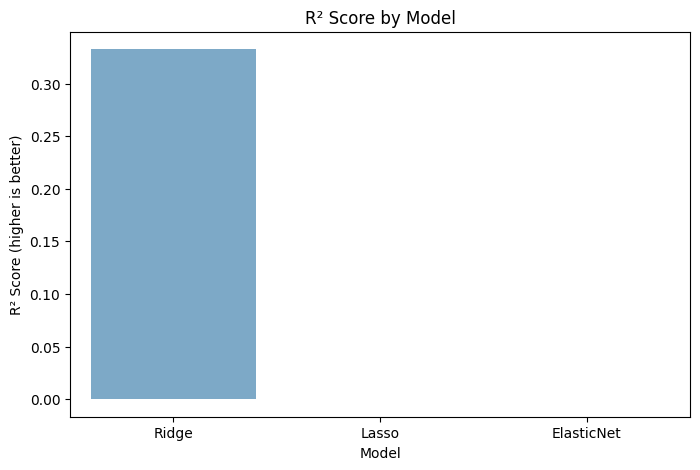

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Collect results from your models
results = {
    "Model": ["Ridge", "Lasso", "ElasticNet"],
    "MSE": [mse_r, mse_l, mse_e],
    "R2": [r1,r2,r3]
}

results_df = pd.DataFrame(results)

# R² Score
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="R2", palette="Blues_d")
plt.title("R² Score by Model")
plt.ylabel("R² Score (higher is better)")

plt.show()



/tmp/ipython-input-593417125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MSE", palette="Reds_d")


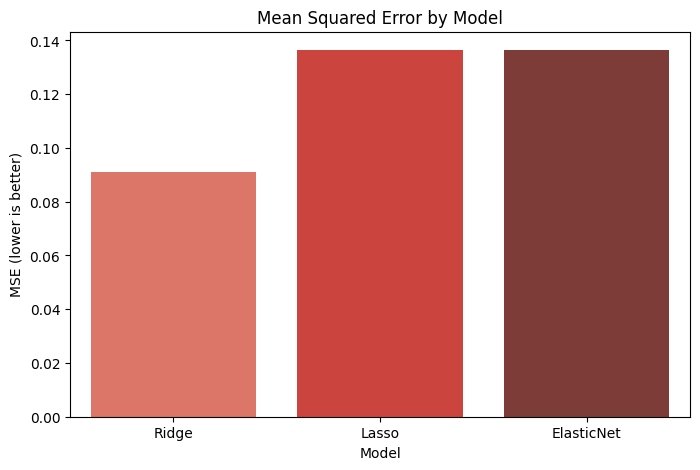

In [ ]:
# MSE
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="MSE", palette="Reds_d")
plt.title("Mean Squared Error by Model")
plt.ylabel("MSE (lower is better)")
plt.show()



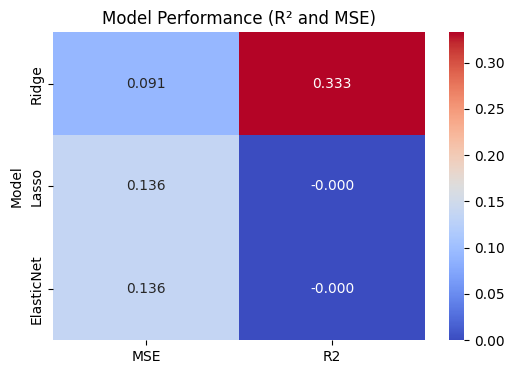

        Model       MSE        R2
0       Ridge  0.091046  0.332656
1       Lasso  0.136444 -0.000096
2  ElasticNet  0.136444 -0.000096


In [ ]:
# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Model Performance (R² and MSE)")
plt.show()

print(results_df)

In [ ]:
results_df

,Model,MSE,R2
0,Ridge,0.091046,0.332656
1,Lasso,0.136444,-0.000096
2,ElasticNet,0.136444,-0.000096


In [ ]:
# Self Learning
from sklearn.linear_model import RANSACRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# RANSAC Regressor
ransac = RANSACRegressor(random_state=42)
ransac.fit(X_train_scaled, y_train)

y_pred_ransac = ransac.predict(X_test_scaled)
r4= r2_score(y_test, y_pred_ransac)
mse_ransac= mean_squared_error(y_test, y_pred_ransac)
print("RANSAC Regressor:")
print("MSE:",mse_ransac )
print("R2 Score:", r4)


RANSAC Regressor:
MSE: 0.163
R2 Score: -0.1947431302270013


In [ ]:
# Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, y_train)

y_pred_bayes = bayesian_ridge.predict(X_test_scaled)
r5= r2_score(y_test, y_pred_ransac)
mse_bayes= mean_squared_error(y_test, y_pred_ransac)
print("Bayesian Ridge Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_bayes))
print("R2 Score:", r2_score(y_test, y_pred_bayes))

Bayesian Ridge Regression:
MSE: 0.09101755102163755
R2 Score: 0.3328675226184843


In [ ]:
results = {
    "Model": ["Ridge", "Lasso", "ElasticNet", "RANSAC", "BayesianRidge"],
    "MSE": [mse_r, mse_l, mse_e, mse_ransac, mse_bayes],
    "R2": [r1, r2, r3, r4, r5]
}

results_df = pd.DataFrame(results)
results_df


,Model,MSE,R2
0,Ridge,0.091046,0.332656
1,Lasso,0.136444,-0.000096
2,ElasticNet,0.136444,-0.000096
3,RANSAC,0.163000,-0.194743
4,BayesianRidge,0.163000,-0.194743
